# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pandas as pd
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [163]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
     


        
# Print the city count to confirm sufficient count
len(cities)




611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [164]:
lat=[]
lng=[]
temp=[]
hum=[]
cloud=[]
wind=[]
name=[]
units="imperial"
for city in cities:
    try:
        url="http://api.openweathermap.org/data/2.5/weather?q="+city+"&appid="+api_key+"&units="+units
        response=requests.get(url).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        name.append(response["name"])
        print(city)
        
      
    
    except Exception:
        print("There is no information for this city: "+city)



upernavik
arraial do cabo
talnakh
dafeng
hobart
hilo
khatanga
qaanaaq
chumikan
nome
bredasdorp
bafoulabe
centralia
kabompo
There is no information for this city: skalistyy
punta arenas
hofn
lensk
manaure
saint-augustin
sao gabriel da cachoeira
jamestown
mataura
oktyabrskoye
ponta do sol
ushuaia
soyo
hithadhoo
aykhal
There is no information for this city: sentyabrskiy
camacha
vaini
monrovia
kapaa
tiksi
bambous virieux
albany
There is no information for this city: kashi
luderitz
gat
saint-philippe
zhangye
butaritari
bandarbeyla
puerto ayora
mount gambier
necochea
thompson
mirnyy
geraldton
mozarlandia
sampit
yelan-koleno
barrow
east london
atuona
There is no information for this city: attawapiskat
There is no information for this city: illoqqortoormiut
rikitea
rawson
araouane
bluff
There is no information for this city: barentsburg
cap malheureux
ilulissat
ribeira grande
There is no information for this city: bengkulu
There is no information for this city: jiddah
kodiak
There is no inform

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [165]:
city_dict={
    "City":name,
    "Latitude":lat,
    "Longitude":lng,
    "Temperature °F":temp,
    "Humidity":hum,
    "Wind Speed":wind,
    "Cloudiness":cloud
}

In [166]:
city_df=pd.DataFrame(city_dict)
city_df.head(10)

,City,Latitude,Longitude,Temperature °F,Humidity,Wind Speed,Cloudiness
0,Upernavik,72.79,-56.15,31.26,53,8.81,0
1,Arraial do Cabo,-22.97,-42.02,70.91,98,5.68,100
2,Talnakh,69.49,88.39,21.20,85,6.71,0
3,Dafeng,33.20,120.46,72.68,46,6.89,92
4,Hobart,-42.88,147.33,55.47,62,9.17,75
5,Hilo,19.71,-155.08,73.11,65,3.36,40
6,Khatanga,71.98,102.47,18.43,90,3.65,79
7,Qaanaaq,77.48,-69.36,19.29,65,10.74,85
8,Chumikan,54.72,135.31,38.08,82,4.81,12
9,Nome,30.04,-94.42,67.77,88,4.47,1


In [167]:
output_file=city_df.to_csv("output_file")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

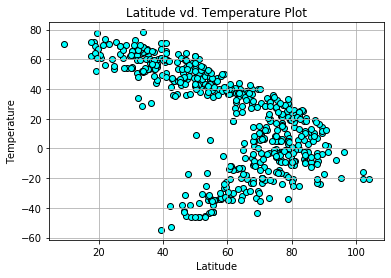

In [168]:
plt.scatter(city_df["Temperature °F"],city_df["Latitude"],edgecolors="black",facecolors="aqua")
plt.title("Latitude vd. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.savefig("Plots/LatitudevsTemperature.png")

#### Latitude vs. Humidity Plot

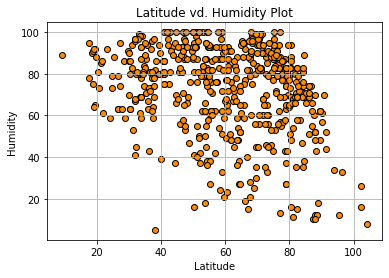

In [169]:
plt.scatter(city_df["Temperature °F"],city_df["Humidity"],edgecolors="black",facecolors="darkorange")
plt.title("Latitude vd. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Plots/LatitudevsHumidity.png")

#### Latitude vs. Cloudiness Plot

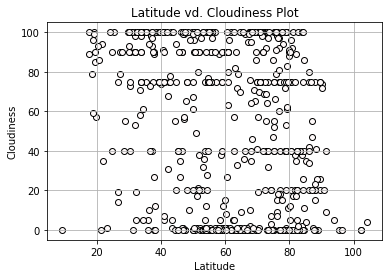

In [170]:
plt.scatter(city_df["Temperature °F"],city_df["Cloudiness"],edgecolors="black",facecolors="snow")
plt.title("Latitude vd. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Plots/LatitudevsCloudiness.png")

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/LatitudevsWindSpeed.png'

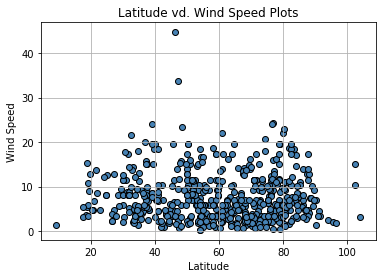

In [172]:
plt.scatter(city_df["Temperature °F"],city_df["Wind Speed"],edgecolors="black",facecolors="steelblue")
plt.title("Latitude vd. Wind Speed Plots")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Plots/LatitudevsWindSpeed.png")